## Example using MultiOutput

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
import numpy as np
import pickle


# Distance dataset
# Input (meters)
distance = np.array([[2.0], [2.25], [2.5], [2.75], [3.0], [3.25], [3.5], [3.7], 
                     [4.0], [4.3], [4.6], [4.8], [5.0], [5.2], [5.5], [5.75], 
                     [6.0], [6.3], [6.5], [6.8], [7.0], [7.3], [7.5], [7.8], 
                     [8.0], [8.2], [8.5], [9.0], [9.6], [10.0], [10.5], [10.8]])

# Output
# Shooter speed (RPM), Hood angle (deg)
output = np.array([[3000, 80], [3000, 75], [3000, 70], [3000, 65], [3300, 60], [3300, 57], [3300, 56], [3300, 55], 
                   [3300, 54], [3300, 53], [3600, 53], [3600, 52], [3600, 51], [3700, 51], [3700, 50], [3800, 50], 
                   [3800, 49], [3900, 49], [3900, 48], [3900, 47], [4100, 47], [4200, 47], [4200, 47], [4400, 47], 
                   [4400, 46], [4500, 46], [4600, 46], [4700, 45], [4800, 45], [4900, 45], [5000, 45], [5600, 30]])

# Verification set
distance2 = np.array([[3.0], [3.2], [3.4], [3.6], [3.8], [4.0], [4.2], [4.4], [4.6], 
                      [4.8], [5.0], [5.2], [5.4], [5.6], [5.8], [6.0], [6.2], [6.4], 
                      [6.6], [6.8], [7.0], [7.2], [7.4], [7.6], [7.8], [8.0], [8.2], 
                      [8.4], [8.6], [8.8], [9.0], [9.2], [9.4], [9.6], [9.8], [10.0]])

knn = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', 
                          leaf_size=30, p=2, metric='minkowski', metric_params=None, 
                          n_jobs=None)

regr = MultiOutputRegressor(knn)

regr.fit(distance, output)

output2 = regr.predict(distance2)

print(output2)

filename = 'shooterModel.sav'
pickle.dump(regr, open(filename, 'wb'))

[[3300.           60.        ]
 [3279.5221843    57.78156997]
 [3300.           56.4137931 ]
 [3300.           55.79735683]
 [3300.           54.90834473]
 [3300.           54.        ]
 [3359.05511811   53.34645669]
 [3426.92307692   52.84615385]
 [3600.           53.        ]
 [3600.           52.        ]
 [3600.           51.        ]
 [3700.           51.        ]
 [3709.18918919   50.26486486]
 [3732.14285714   50.07142857]
 [3790.625        49.83333333]
 [3800.           49.        ]
 [3867.5          48.8       ]
 [3903.125        48.3125    ]
 [3914.81481481   47.88888889]
 [3900.           47.        ]
 [4100.           47.        ]
 [4159.25925926   47.        ]
 [4221.875        46.9375    ]
 [4259.25925926   46.88888889]
 [4400.           47.        ]
 [4400.           46.        ]
 [4500.           46.        ]
 [4544.           46.        ]
 [4567.44186047   45.93023256]
 [4626.66666667   45.5       ]
 [4700.           45.        ]
 [4714.05750799   45.2172524 ]
 [4788.9

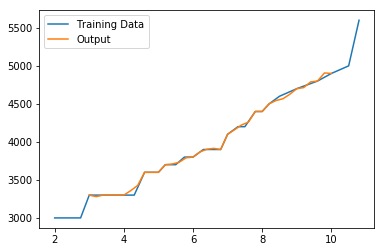

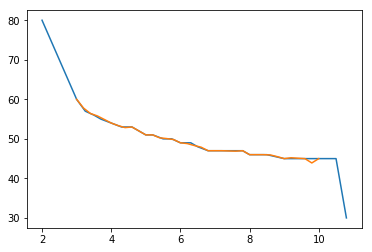

In [2]:
import matplotlib
matplotlib.use('Qt5agg')
import matplotlib.pyplot as plt
%matplotlib inline

_, plt1 = plt.subplots()

plt1.plot(distance, output[:,0])
plt1.plot(distance2, output2[:,0])
plt1.legend(["Training Data", "Output"])

_, plt2 = plt.subplots()

plt2.plot(distance, output[:,1])
plt2.plot(distance2, output2[:,1])
plt1.legend(["Training Data", "Output"])